In [21]:
!pip install minisom

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/som_data.csv"

# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/1ssplit%20combined%20dataset%20CAIDA%202007.csv"

df = pd.read_csv(url)



In [23]:
# # Filter rows where any of the specified columns contain 0
# rows_to_remove = df[(df['etpSrcP'] == 0) | (df['etpDstP'] == 0) | (df['etpProtocol'] == 0)]

# # Remove the filtered rows from the DataFrame
# df = df.drop(rows_to_remove.index)

# # Display the updated DataFrame
# print(df)


In [24]:
# import pandas as pd

# # Assuming your DataFrame is already defined as df

# # Filter rows where label equals 0
# filtered_df = df[df['label'] == 0]

# # Concatenate the filtered rows into a new DataFrame
# result_df = pd.concat([filtered_df[col] for col in filtered_df.columns], axis=1)

# # Reset index if needed
# result_df.reset_index(drop=True, inplace=True)

# # Display the resulting DataFrame
# print(result_df)
# traindf = (result_df)


In [25]:
# # Import necessary libraries
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Step 1: Visualize distributions of numerical features
# sns.pairplot(df)
# plt.show()

# # Step 2: Calculate summary statistics
# summary_stats = df.describe()
# print(summary_stats)

# # Step 3: Detect outliers using Z-score
# from scipy import stats

# # Define a function to detect outliers using Z-score
# def detect_outliers_zscore(data):
#     z_scores = stats.zscore(data)
#     abs_z_scores = abs(z_scores)
#     outlier_indices = (abs_z_scores > 3).any(axis=1)
#     return outlier_indices

# # Apply the function to numerical columns
# numerical_columns = ['etpSrcP', 'etpDstP', 'totalPacket']
# outliers_zscore = detect_outliers_zscore(df[numerical_columns])

# # Step 4: Visualize outliers using box plots
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df[numerical_columns])
# plt.title('Box plot of numerical features')
# plt.show()

# # Print rows containing outliers
# print(df[outliers_zscore])



In [26]:
# # Filter rows where any of the specified columns contain 0
# rows_with_zero_value = df[(df['etpSrcP'] == 0) | (df['etpDstP'] == 0) | (df['etpProtocol'] == 0)]

# # Display the filtered rows
# print(rows_with_zero_value)
# len(rows_with_zero_value)
# rows_with_zero_value

In [27]:
# Display the first few rows of the dataset to understand its structure
print(df.head())




   src_ip_entropy   src_port_entropy   dst_port_entropy   protocol_entropy  \
0             1.0               -0.0               -0.0               -0.0   
1             1.0               -0.0               -0.0               -0.0   
2             1.0               -0.0               -0.0               -0.0   
3             1.0               -0.0               -0.0               -0.0   
4             1.0               -0.0               -0.0               -0.0   

    total_packets   label  
0               0       0  
1               8       0  
2              16       0  
3              24       0  
4              32       0  


In [28]:
# Check the data types and basic statistics of the numerical columns
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_ip_entropy     890 non-null    float64
 1    src_port_entropy  890 non-null    float64
 2    dst_port_entropy  890 non-null    float64
 3    protocol_entropy  890 non-null    float64
 4    total_packets     890 non-null    int64  
 5    label             890 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 41.8 KB
None
       src_ip_entropy   src_port_entropy   dst_port_entropy  \
count      890.000000         890.000000         890.000000   
mean         5.859651           5.163579           0.491413   
std          4.108636           4.766385           1.065047   
min          1.000000          -0.000000          -0.000000   
25%          1.811278           0.000000           0.000000   
50%          4.141789           3.197070           0.011676   
75%         10.

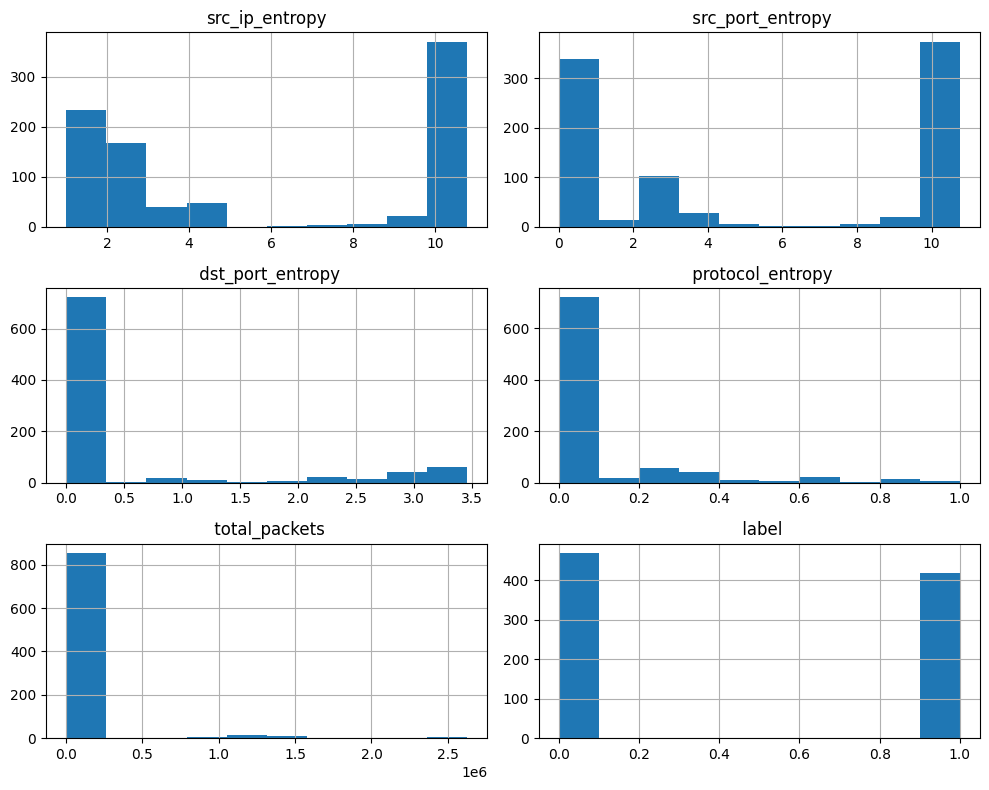

In [29]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



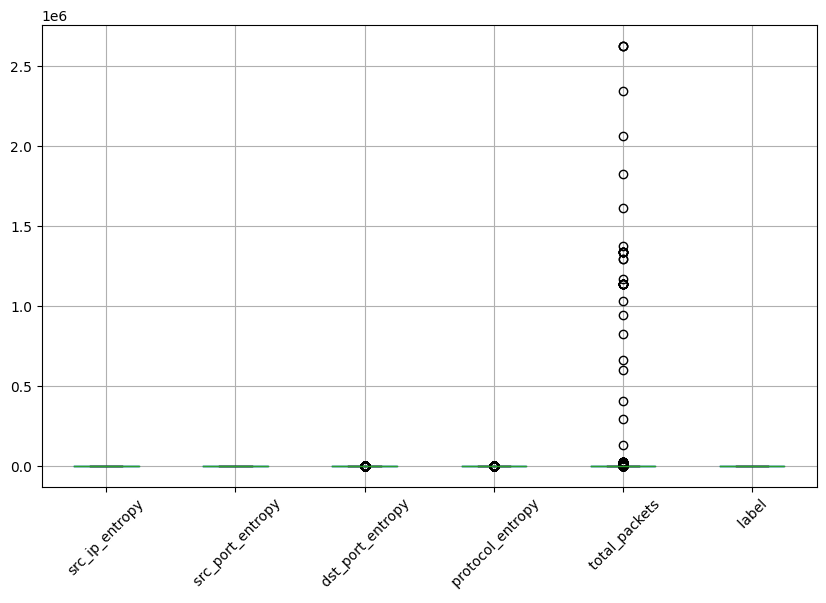

In [30]:
# Boxplot for numerical features
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

# You can also create other types of plots like scatter plots, bar plots, etc. based on your analysis needs

In [31]:
import numpy as np

In [32]:
# df = pd.read_csv(url)

# Define the columns to exclude from normalization
exclude_cols = ['label']  # Add more columns here if needed

# Calculate and store the mean and standard deviation for each dimension, excluding specified columns
mean_std_dict = {}
for col in df.columns:
    if col not in exclude_cols:
        mean_std_dict[col] = (df[col].mean(), df[col].std())

# Define the function for normalization using tanh-estimator method, excluding specified columns
def normalize_with_tanh_estimator(data, mean_std_dict, exclude_cols):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        if col not in exclude_cols:
            mu, sigma = mean_std_dict[col]
            normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
            normalized_data[col] = normalized_col
        else:
            normalized_data[col] = data[col]  # Keep excluded columns as they are
    return normalized_data

# Normalize the dataset using tanh-estimator method, excluding specified columns
normalized_df = normalize_with_tanh_estimator(df, mean_std_dict, exclude_cols)

# Display the first few rows of the normalized dataset
print(normalized_df.head())

# Store mean_std_dict for later use in real-time operation
# You can save it to a file or store it in memory, depending on your requirements
print("mean_std_dict", mean_std_dict)

   src_ip_entropy   src_port_entropy   dst_port_entropy   protocol_entropy  \
0        0.441135           0.446044           0.476946           0.476975   
1        0.441135           0.446044           0.476946           0.476975   
2        0.441135           0.446044           0.476946           0.476975   
3        0.441135           0.446044           0.476946           0.476975   
4        0.441135           0.446044           0.476946           0.476975   

    total_packets     label  
0        0.490528  0.452901  
1        0.490530  0.452901  
2        0.490531  0.452901  
3        0.490532  0.452901  
4        0.490534  0.452901  
mean_std_dict {'src_ip_entropy': (5.859651345851808, 4.108635928476103), ' src_port_entropy': (5.163579388055372, 4.766385146457139), ' dst_port_entropy': (0.4914131701108134, 1.0650466840364472), ' protocol_entropy': (0.08352360984968017, 0.18124781089100866), ' total_packets': (53037.1202247191, 279940.165663548), ' label': (0.47191011235955055, 0

In [33]:
mean_std_dict

{'src_ip_entropy': (5.859651345851808, 4.108635928476103),
 ' src_port_entropy': (5.163579388055372, 4.766385146457139),
 ' dst_port_entropy': (0.4914131701108134, 1.0650466840364472),
 ' protocol_entropy': (0.08352360984968017, 0.18124781089100866),
 ' total_packets': (53037.1202247191, 279940.165663548),
 ' label': (0.47191011235955055, 0.4994910264453455)}

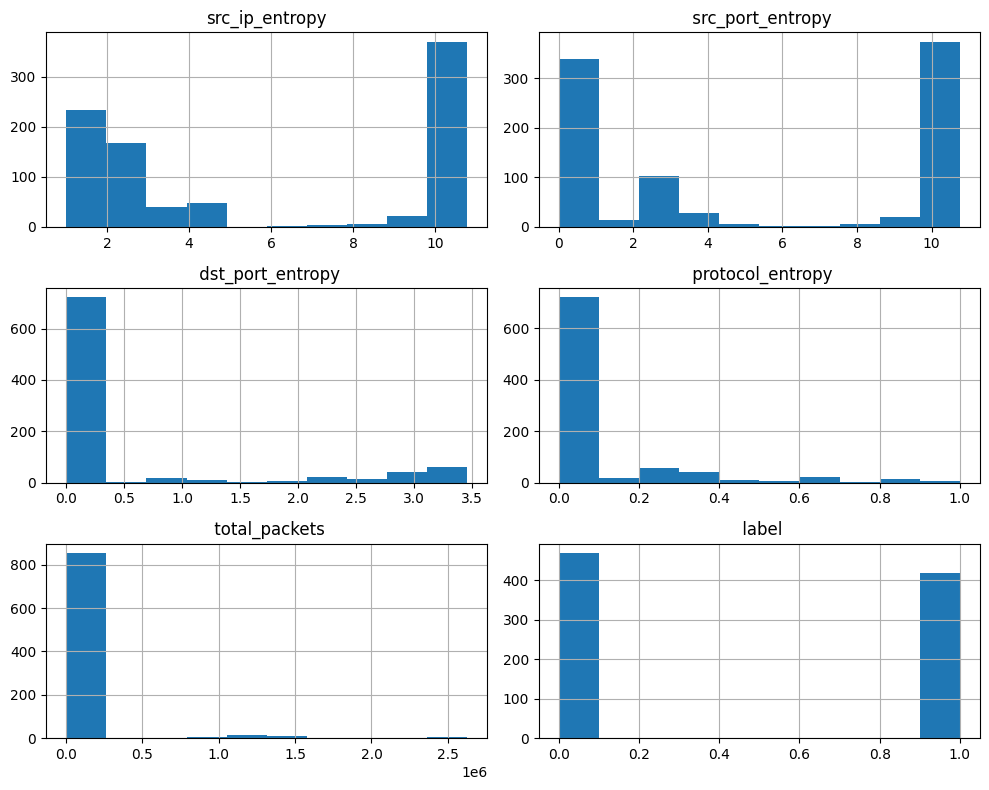

In [34]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [35]:
from sklearn.model_selection import train_test_split


In [36]:
import pandas as pd

# Assuming your DataFrame is already defined as df

# Filter rows where label equals 0
filtered_df = normalized_df[normalized_df[' label'] == 0]

# Concatenate the filtered rows into a new DataFrame
result_df = pd.concat([filtered_df[col] for col in filtered_df.columns], axis=1)

# Reset index if needed
result_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(result_df)
traindf = (result_df)


Empty DataFrame
Columns: [src_ip_entropy,  src_port_entropy,  dst_port_entropy,  protocol_entropy,  total_packets,  label]
Index: []


In [37]:
X = normalized_df.iloc[:, :-1].values
y = normalized_df.iloc[:, -1].values


In [38]:
trainX = traindf.iloc[:, :-1].values
trainy = traindf.iloc[:, -1].values


In [39]:
trainX.shape

(0, 5)

In [40]:
X.shape

(890, 5)

In [41]:
data = X

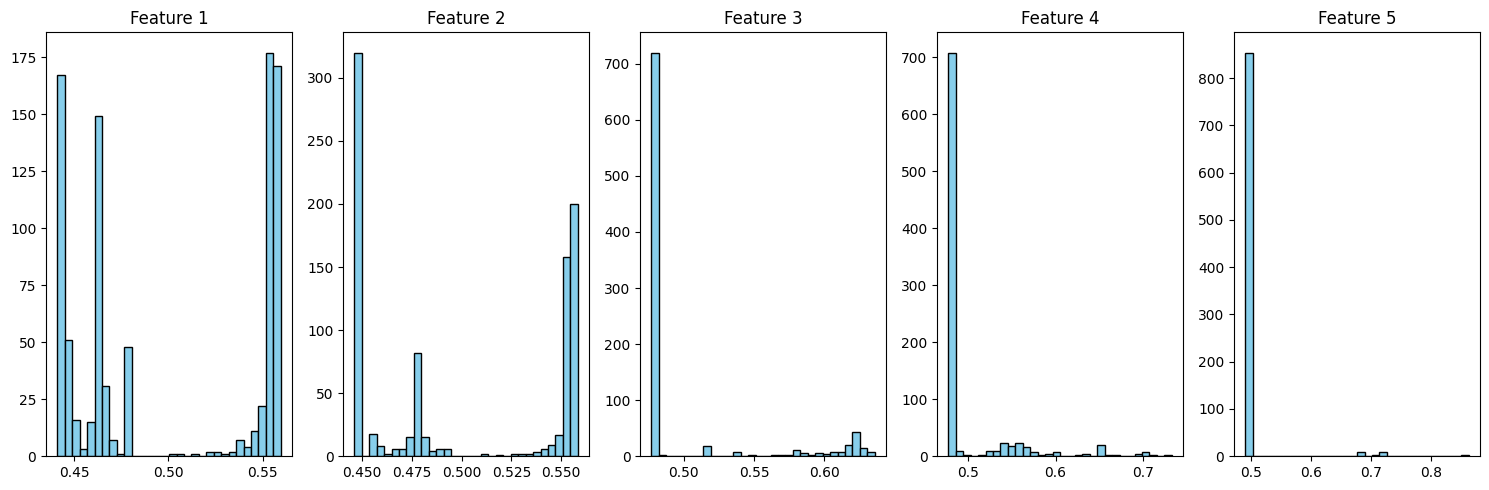

In [42]:
# Plot histograms for each numerical feature
num_features = data.shape[1]  # Get the number of features
fig, axs = plt.subplots(1, num_features, figsize=(15, 5))  # Create subplots

for i in range(num_features):
    axs[i].hist(data[:, i], bins=30, color='skyblue', edgecolor='black')  # Plot histogram
    axs[i].set_title(f'Feature {i+1}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [43]:
X

array([[0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49052819],
       [0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49052962],
       [0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49053105],
       ...,
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.49076066],
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.4907678 ],
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.49077495]])

In [44]:
!pip install scikit-learn

In [45]:
# # from sklearn.preprocessing import MinMaxScaler

# # sc = MinMaxScaler(feature_range=(0, 1))
# # X = sc.fit_transform(X)


from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Assuming df contains only numerical columns that need to be scaled


# # # # Normalization
# # # scaler = MinMaxScaler()
# # # df_normalized = X.copy()
# # # df_normalized = scaler.fit_transform(df)

# # # Standardization
# # scaler = StandardScaler()
# # df_standardized = X.copy()
# # df_standardized = scaler.fit_transform(X)

# # X = df_standardized


# # sc = MinMaxScaler(feature_range=(0, 1))
# # X = sc.fit_transform(X)
# # compute required values
# scaler = StandardScaler()
# model = scaler.fit(data)
# scaled_data = model.transform(data)

# X = scaled_data

In [46]:
data = X
data

array([[0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49052819],
       [0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49052962],
       [0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49053105],
       ...,
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.49076066],
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.4907678 ],
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.49077495]])

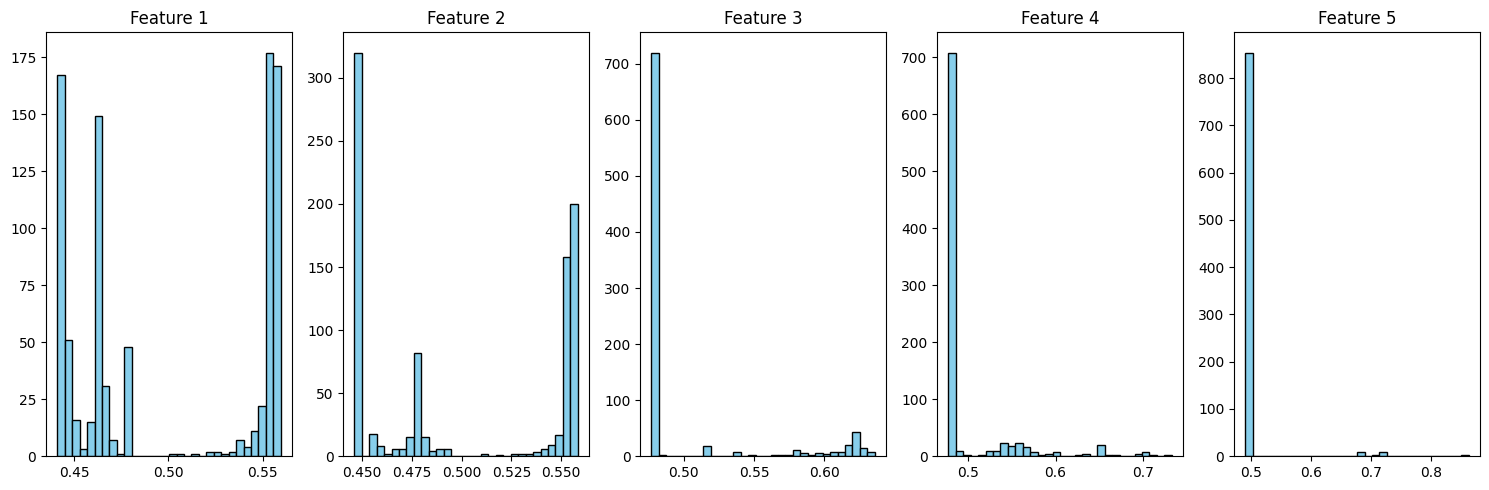

In [47]:
# Plot histograms for each numerical feature
num_features = data.shape[1]  # Get the number of features
fig, axs = plt.subplots(1, num_features, figsize=(15, 5))  # Create subplots

for i in range(num_features):
    axs[i].hist(data[:, i], bins=30, color='skyblue', edgecolor='black')  # Plot histogram
    axs[i].set_title(f'Feature {i+1}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [48]:

y

array([0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290096,
       0.45290096, 0.45290096, 0.45290096, 0.45290096, 0.45290

Column Name		Missing Values
----------------------------------
src_ip_entropy			0
 src_port_entropy			0
 dst_port_entropy			0
 protocol_entropy			0
 total_packets			0
 label			0


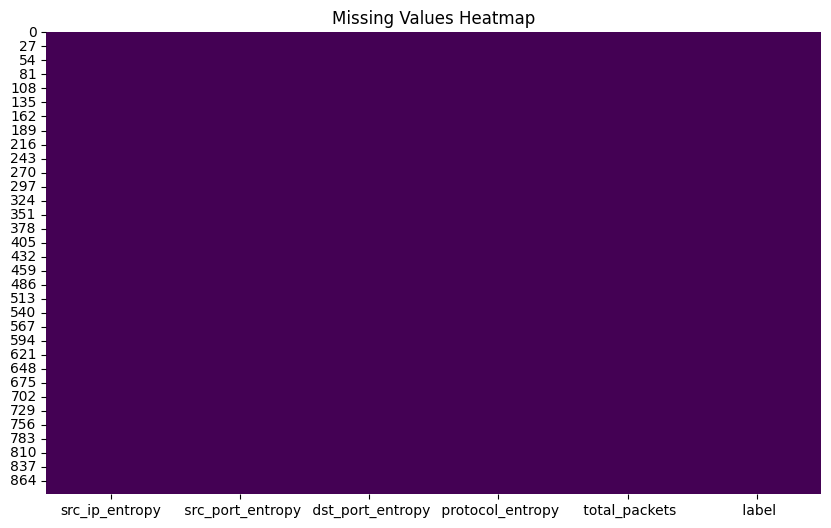

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Listing columns and their respective number of missing values
missing_values = df.isnull().sum()

# Displaying the missing values
print("Column Name\t\tMissing Values")
print("----------------------------------")
for column, missing_count in missing_values.items():
    print(f"{column}\t\t\t{missing_count}")

# Creating a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [50]:
# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
import matplotlib.pyplot as plt

In [52]:
from minisom import MiniSom
from sklearn.neighbors import KNeighborsClassifier


In [53]:
# Initialize and train SOM
som_size = 30  # Example size, adjust based on your dataset

In [54]:
som = MiniSom(som_size, som_size, X_train.shape[1], sigma=15, learning_rate=0.8, random_seed=0 )



In [55]:
som.random_weights_init(trainX)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
u_matrixfirst = som.distance_map()  # Get the U-matrix

In [ ]:
# # Plot the U-matrix
# plt.figure(figsize=(6, 6))
# plt.pcolor(u_matrixfirst, cmap='viridis')  # Use 'viridis' colormap for better visualization
# plt.colorbar()
# plt.title('U-matrix')
# plt.show()


In [ ]:
# # Create plots to visualize the SOM before and after training
# plt.figure(figsize=(12, 6))

# # Plot before training
# plt.subplot(1, 2, 1)
# plt.title("SOM Before Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map

# # Plot data points with labels before training
# for i, (x, y) in enumerate(X_train):
#     color = 'r' if y_train[i] == 1 else 'b'  # red for label 1, blue for label 0
#     plt.plot(x, y, marker='o', color=color, markersize=5)

# # Train the SOM for 1000 epochs
# som.train_batch(X_train, 1000, verbose = 'true')

# # Plot after training
# plt.subplot(1, 2, 2)
# plt.title("SOM After Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map

# # Plot data points with labels after training
# for i, (x, y) in enumerate(X_train):
#     color = 'r' if y_train[i] == 1 else 'b'  # red for label 1, blue for label 0
#     plt.plot(x, y, marker='o', color=color, markersize=5)

# plt.colorbar()
# plt.tight_layout()
# plt.show()

In [ ]:
# # Visualize the SOM before training
# plt.figure(figsize=(6, 6))
# plt.title("SOM Before Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map
# plt.colorbar()
# plt.show()

In [ ]:
# Train the SOM for 1000 epochs
# som.train_batch(X_train, 10000000, verbose = "true")
som.train_batch(trainX, 100, verbose = "true")

In [ ]:
import pickle

In [ ]:
# with open('som.p', 'rb') as infile:
#     som = pickle.load(infile)

In [ ]:
u_matrixlast = som.distance_map()  # Get the U-matrix

In [ ]:
# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')
plt.colorbar()

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
# testvalues = X_test
# testvalues = X_train
testvalues = X
# testlabels = y_train
testlabels = y


In [ ]:
# Calculate the reference point G
g = np.median(som.get_weights(), axis=(0, 1))

# Function to calculate distance between input sample V and reference point G
def calculate_distance(v, g):
    return np.linalg.norm(v - g)

# Function to classify input sample as attack or normal and update y_pred array
def classify_and_update(sample, d_threshold, sigma, y_pred):
  for sam in sample:
    distance_to_g = calculate_distance(sam, g)
    # print("distance_to_g", distance_to_g)
    p_d_greater_than_x = 1 - np.exp(- (distance_to_g / sigma)**2)  # Cumulative distribution function
    is_attack = distance_to_g > d_threshold or p_d_greater_than_x > 0.6  # You can adjust the threshold as needed
    y_pred.append(1 if is_attack else 0)


In [ ]:

# Example usage
input_sample = testvalues  # Example input sample (you can replace this with your actual data)
d_threshold = 0.1  # Predefined distance threshold
# d_threshold = 0.10900000000000001
  # Predefined distance threshold
sigma = 0.2  # Probability threshold
# sigma = 0.11400000000000002
 # Probability threshold


y_pred = []  # Initialize the y_pred array
print(y_pred)
# Classify the input sample and update y_pred array
classify_and_update(input_sample, d_threshold, sigma, y_pred)

print("Predicted labels for the input sample:", y_pred)
ypred = np.array(y_pred)

In [ ]:
def classify_and_update(sam, d_threshold, sigma, y_pred):
  distance_to_g = calculate_distance(sam, g)
  # print("distance_to_g", distance_to_g)
  p_d_greater_than_x = 1 - np.exp(- (distance_to_g / sigma)**2)  # Cumulative distribution function
  is_attack = distance_to_g > d_threshold or p_d_greater_than_x > 0.6  # You can adjust the threshold as needed
  y_pred.append(1 if is_attack else 0)


In [ ]:
ypred.shape

In [ ]:
y_test

In [ ]:
y_test.shape

In [ ]:
ypred

In [ ]:
testvalues

In [ ]:
y_pred
ypred

In [ ]:
# Evaluate performance
from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred, zero_division=1))
print(classification_report(testlabels, y_pred, zero_division=1))
# Calculate False Detection Rate (FDR)
# precision_recall = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
precision_recall = classification_report(testlabels, y_pred, output_dict=True, zero_division=1)
precision_ddos = precision_recall['1']  # Assuming '1' represents DDoS class

FDR = (1 - precision_ddos['precision'])* 100
print(f"False Detection Rate (FDR): {FDR:.2f}%")

In [ ]:
#ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(testlabels, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have defined markers and colors based on your class labels
markers = ['o', 's']
colors = ['r', 'g']

# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')

# Add markers based on class labels
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5,
             markers[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)

plt.colorbar()

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')

# Add markers based on class labels
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5,
             markers[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)

plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:

print
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Define the range and step size for sigma and d_threshold
sigma_min = 0.1
sigma_max = 0.17
sigma_step = 0.001

d_threshold_min = 0.10
d_threshold_max = 0.15
d_threshold_step = 0.001
# Generate arrays of varying values for sigma and d_threshold
sigma_values = np.arange(sigma_min, sigma_max + sigma_step, sigma_step)
d_threshold_values = np.arange(d_threshold_min, d_threshold_max + d_threshold_step, d_threshold_step)



# Print the generated values
print("Sigma values:", sigma_values)
print("d_threshold values:", d_threshold_values)

# Initialize an empty dataframe
df_results = pd.DataFrame(columns=['sigma', 'd_threshold', 'accuracy', 'FDR'])
max = len(sigma_values)*len(d_threshold_values)
i=1
# Example usage loop to calculate accuracy and FDR for each parameter combination
for sigma in sigma_values:
    for d_threshold in d_threshold_values:
        y_pred = []  # Initialize y_pred for each combination of parameters
        classify_and_update(input_sample, d_threshold, sigma, y_pred)
        ypred = np.array(y_pred)

        # Evaluate performance
        report = classification_report(testvalues, y_pred, zero_division=1, output_dict=True)
        accuracy = report['accuracy']

        # Calculate False Detection Rate (FDR)
        precision_recall = report['1']  # Assuming '1' represents DDoS class
        FDR = (1 - precision_recall['precision']) * 100

        # Append the results to the dataframe
        df_results = df_results.append({'sigma': sigma, 'd_threshold': d_threshold, 'accuracy': accuracy, 'FDR': FDR}, ignore_index=True)
        print(f"{i} OF {max}")
        i=i+1

# Print the dataframe for analysis
# print(df_results)


In [ ]:
df_results

In [ ]:
y_test

In [ ]:
ypred

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_results contains the data from the previous code snippet

# Convert dataframe columns to numpy arrays for plotting
sigma_values = df_results['sigma'].values
d_threshold_values = df_results['d_threshold'].values
accuracy_values = df_results['accuracy'].values

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(sigma_values, d_threshold_values, accuracy_values, cmap='viridis')

# Set labels and title
ax.set_xlabel('Sigma')
ax.set_ylabel('d_threshold')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs. Sigma and d_threshold')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting changes in accuracy with respect to d_threshold
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='d_threshold', y='accuracy', hue='sigma', marker='o')
plt.title('Accuracy vs d_threshold')
plt.xlabel('d_threshold')
plt.ylabel('Accuracy')
plt.legend(title='sigma')
plt.grid(True)
plt.show()

# Plotting changes in accuracy with respect to sigma
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='sigma', y='accuracy', hue='d_threshold', marker='o')
plt.title('Accuracy vs sigma')
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.legend(title='d_threshold')
plt.grid(True)
plt.show()


In [ ]:
# Assuming df_results contains the data from the previous code snippets

# Find the row with maximum accuracy
max_accuracy_row = df_results[df_results['accuracy'] == df_results['accuracy'].max()]

# Extract the corresponding sigma and d_threshold values
max_sigma = max_accuracy_row['sigma'].values[0]
max_d_threshold = max_accuracy_row['d_threshold'].values[0]

# Print the range of sigma and d_threshold values for maximum accuracy
print(f"Range of sigma for maximum accuracy: {max_sigma}")
print(f"Range of d_threshold for maximum accuracy: {max_d_threshold}")


In [ ]:
# # Plot the U-matrix
# plt.figure(figsize=(6, 6))
# plt.pcolor(u_matrixlast, cmap='viridis')  # Use 'viridis' colormap for better visualization
# plt.colorbar()
# plt.title('U-matrix')
# plt.show()


In [ ]:
# # Visualize the SOM after training
# plt.figure(figsize=(6, 6))
# plt.title("SOM After Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map
# plt.colorbar()
# plt.show()


In [ ]:
import pickle

In [ ]:
# # saving the som in the file som.p
# with open('som.p', 'wb') as outfile:
#     pickle.dump(som, outfile)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
def map_to_bmu(som, X):
    winner_coordinates = np.array([som.winner(x) for x in X]).T
    return np.ravel_multi_index(winner_coordinates, (som.get_weights().shape[0], som.get_weights().shape[1]))

# Example usage:
# Assuming 'som' is your trained MiniSom model and 'X' is your input data

# Map input data to BMUs
cluster_index = map_to_bmu(som, X_train)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Example k value, adjust based on your dataset

# Fit k-NN classifier using cluster indices as features
knn.fit(cluster_index.reshape(-1, 1), y_train)  # Assuming 'y' is your target labels

# Example prediction (you can replace X_test with real-time data)
# Assuming 'X_test' is your test set and 'y_test' is your test set labels
test_cluster_index = map_to_bmu(som, X_test)
y_pred = knn.predict(test_cluster_index.reshape(-1, 1))



In [ ]:
y_pred.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
X.shape

In [ ]:
# Evaluate performance
print(classification_report(y_test, y_pred))
# Calculate False Detection Rate (FDR)
precision_recall = classification_report(y_test, y_pred, output_dict=True)
precision_ddos = precision_recall['0']  # Assuming '1' represents DDoS class

FDR = (1 - precision_ddos['precision'])* 100
print(f"False Detection Rate (FDR): {FDR:.2f}%")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed


# Step 4: Train the classifier
knn.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
# Option 1: Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Option 2: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Option 3: Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Option 4: Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_train contains the labels (0 and 1) for each data point

# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')
plt.colorbar()

# Add labels for the data points
plt.scatter(range(len(y_train)), [0.5] * len(y_train), c=y_train, cmap='coolwarm', marker='|')
plt.ylim(0, 1)  # Adjust y-axis limits for the labels

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')
plt.colorbar()

# Add labels for the data points
plt.scatter(range(len(y_train)), [0.5] * len(y_train), c=y_train, cmap='coolwarm', marker='|')
plt.ylim(0, 1)  # Adjust y-axis limits for the labels

plt.tight_layout()
plt.show()
